In [1]:
# import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')      

# Import Logging  Files
import logging
logging.basicConfig(
    level=logging.INFO,
    filemode='w',
    filename='model.log',
    format='%(asctime)s - %(levelname)s - %(message)s',force=True
)



In [2]:
Url='https://raw.githubusercontent.com/MontyVasita18/Heart_Disease_MLModel/refs/heads/main/heartdisease.csv'
data=pd.read_csv(Url)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
logging.info('Data Set is Loaded Sucssfuly')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.shape

(303, 14)

In [7]:
# Checking Missing Values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

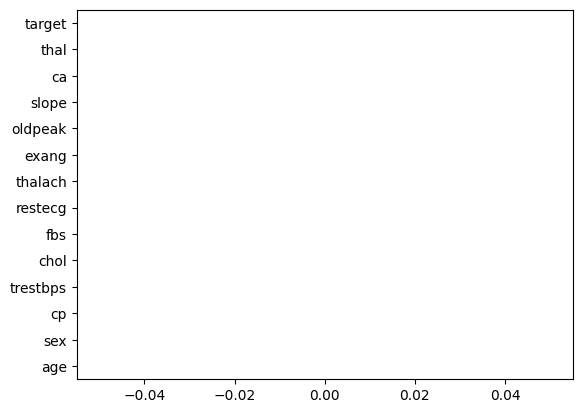

In [8]:
# Checking Missing Information If Any Using Graphical Method

data.isnull().sum().plot(kind='barh')

In [9]:
# Checking Desc
from collections import OrderedDict
stats=[]

for i in data:
    data_stats=OrderedDict({
        
        'Feature':i,
        'mean':data[i].mean(),
        'median':data[i].median(),
        '25%':data[i].quantile(0.25),
        '50%':data[i].quantile(0.50),
        '75%':data[i].quantile(0.75),
        'Minimum':data[i].min(),
        'Maximum':data[i].max(),
        'Kurtosis':data[i].kurt(),
        'Skewness':data[i].skew(),
        'STD':data[i].std()
    })

    stats.append(data_stats)
    report=pd.DataFrame(stats)
report


,Feature,mean,median,25%,50%,75%,Minimum,Maximum,Kurtosis,Skewness,STD
0,age,54.366337,55.0,47.5,55.0,61.0,29.0,77.0,-0.542167,-0.202463,9.082101
1,sex,0.683168,1.0,0.0,1.0,1.0,0.0,1.0,-1.382961,-0.791335,0.466011
2,cp,0.966997,1.0,0.0,1.0,2.0,0.0,3.0,-1.193071,0.484732,1.032052
3,trestbps,131.623762,130.0,120.0,130.0,140.0,94.0,200.0,0.929054,0.713768,17.538143
4,chol,246.264026,240.0,211.0,240.0,274.5,126.0,564.0,4.505423,1.143401,51.830751
5,fbs,0.148515,0.0,0.0,0.0,0.0,0.0,1.0,1.959678,1.986652,0.356198
6,restecg,0.528053,1.0,0.0,1.0,1.0,0.0,2.0,-1.362673,0.162522,0.525860
7,thalach,149.646865,153.0,133.5,153.0,166.0,71.0,202.0,-0.061970,-0.537410,22.905161
8,exang,0.326733,0.0,0.0,0.0,1.0,0.0,1.0,-1.458317,0.742532,0.469794
9,oldpeak,1.039604,0.8,0.0,0.8,1.6,0.0,6.2,1.575813,1.269720,1.161075


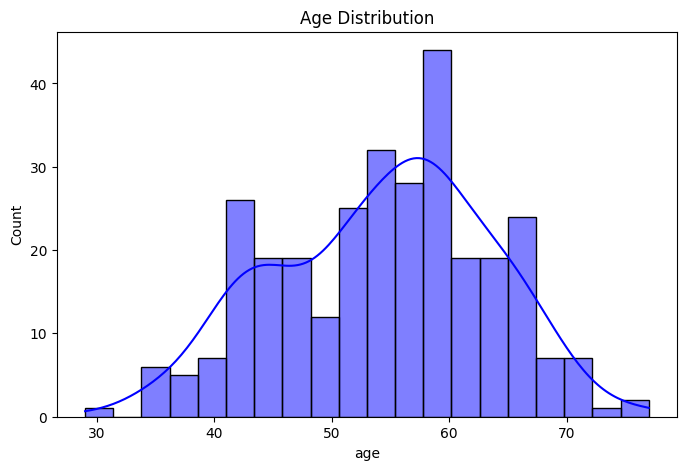

In [64]:
# 1. Checking Age Distribution

plt.figure(figsize=(8, 5))
sns.histplot(data["age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()


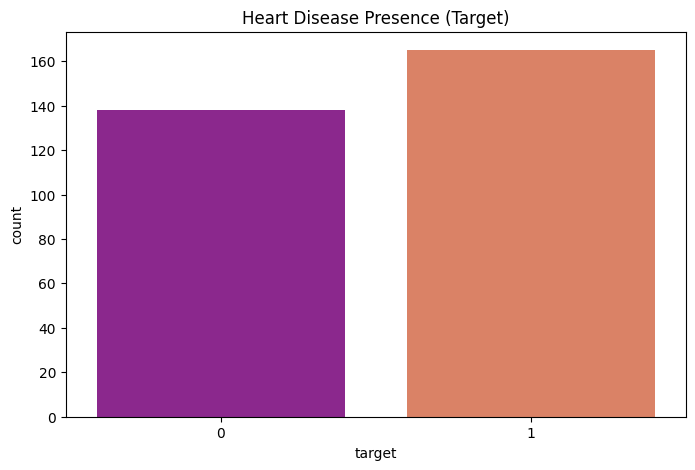

In [61]:
# 2. Checking Sex Distribution

plt.figure(figsize=(8, 5))
sns.countplot(x=data["target"], palette="plasma")
plt.title("Heart Disease Presence (Target)")
plt.show()

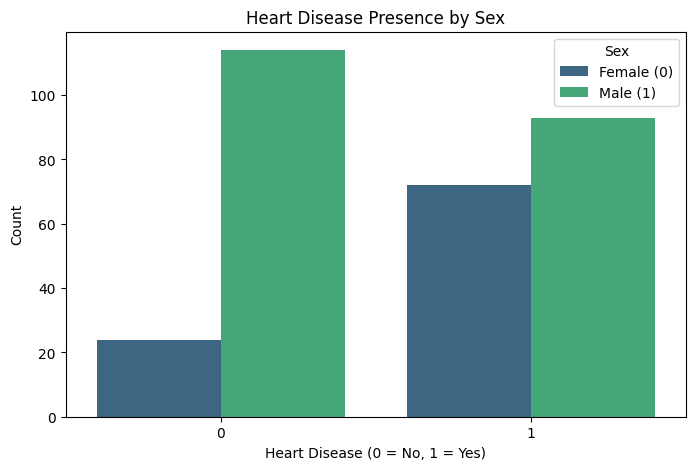

In [62]:
# 3. Countplot comparing heart disease presence by sex
plt.figure(figsize=(8, 5))
sns.countplot(x="target", hue="sex", data=data, palette="viridis")
plt.title("Heart Disease Presence by Sex")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Sex", labels=["Female (0)", "Male (1)"])
plt.show()

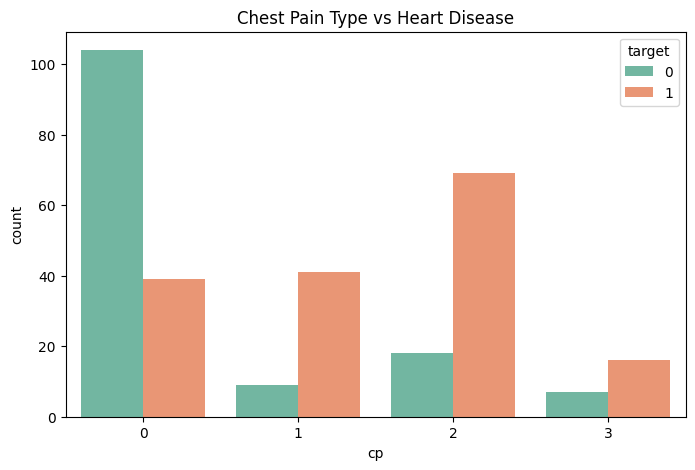

In [67]:
# 4. Countplot for Chest Pain Types (cp) by Target
plt.figure(figsize=(8, 5))
sns.countplot(x="cp", hue="target", data=data, palette="Set2")
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

In [10]:
# Checking Correlation Between Target Column and Independent Column
data.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

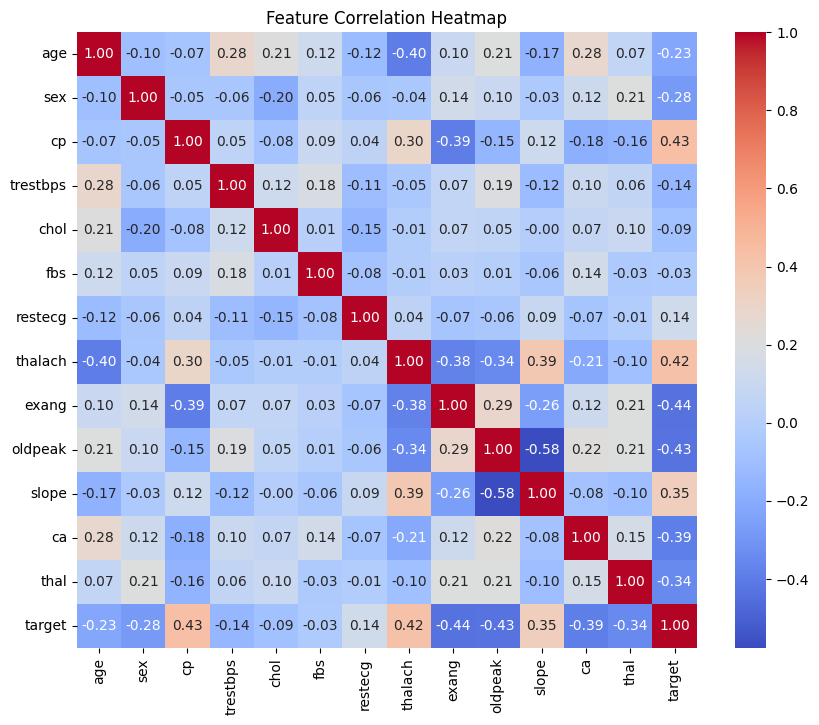

In [47]:
# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [38]:
X=data.drop(columns='target')

y=data['target']

# Spliting the Data Into Training Data and Testing Data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler

Scaler=MinMaxScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [14]:
from imblearn.over_sampling import SMOTE   # we use the over sampling when there is 3 digit data
                                           
sm=SMOTE(random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)


In [71]:
# Appling logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

# Training the Model
LR.fit(X_train,y_train)

# Predicting the Test Set Results
y_predict_LR=LR.predict(X_test) 

# Evaluating the Model

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

accuracy_score_LR=accuracy_score(y_test,y_predict_LR)
accuracy_score_LR


0.8131868131868132

In [16]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()

# Training the Model
RF.fit(X_train,y_train)
y_predict_RFC=RF.predict(X_test) 


# Evaluating the Model

accuracy_score_RFC=accuracy_score(y_test,y_predict_RFC)
accuracy_score_RFC

0.8021978021978022

In [68]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)
y_predict_svc=svc.predict(X_test)

# Evaluating the Model

accuracy_score_svc=accuracy_score(y_test,y_predict_svc)
accuracy_score_svc



0.7032967032967034

In [70]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()

# Training the Model

DT.fit(X_train,y_train)
y_predict_DT=DT.predict(X_test)

# Evaluating the Model

accuracy_score_DT=accuracy_score(y_test,y_predict_DT)
accuracy_score_DT


0.7252747252747253

In [69]:
import xgboost as xgb

xgb=xgb.XGBClassifier()

# Training the Model

xgb.fit(X_train,y_train)
y_predict_xgb=xgb.predict(X_test)

# Evaluating the Model

accuracy_score_xgb=accuracy_score(y_test,y_predict_xgb)
accuracy_score_xgb

0.8131868131868132